# Baesian inference example

In [42]:
import pandas as pd
import numpy as np
import math

import statsmodels.api as sm

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 22
%matplotlib inline

from matplotlib import MatplotlibDeprecationWarning

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)

import pymc3 as pm

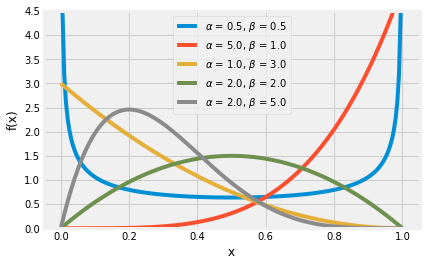

In [3]:
x = np.linspace(0, 1, 200)
alphas = [.5, 5., 1., 2., 2.]
betas = [.5, 1., 3., 2., 5.]
for a, b in zip(alphas, betas):
    pdf = st.beta.pdf(x, a, b)
    plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.ylim(0, 4.5)
plt.legend(loc=9)
plt.show()

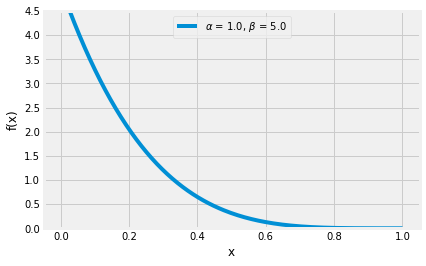

In [4]:
x = np.linspace(0, 1, 200)
alphas = [1.]
betas = [5.]
for a, b in zip(alphas, betas):
    pdf = st.beta.pdf(x, a, b)
    plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.ylim(0, 4.5)
plt.legend(loc=9)
plt.show()

## Bernoulli/binomial likelihood with uniform prior
When we use an uniform or bernulli prior for a bernulli binomial likelihood we get a **beta posterior**. Typical case is the coin toss example.
The posterior for theta given y is then:

\begin{equation*}
\text{prior} \sim Beta(\alpha, \beta),
\end{equation*}

\begin{equation*}
\text{posterior} \sim \theta | \hat{y} \sim Beta(\sum y_i + \alpha, n + \beta - \sum y_i),
\end{equation*}

\begin{equation*}
\text{effective sample size} = \alpha + \beta
\end{equation*}
The sample size is the number of observation of the prior. If this is know we can use it to find the paramenters, if this are just an estimation (some personal judjment) we can use an small effective sample size, and this will give a small effect on the posterior.

\begin{equation*}
\text{prior mean} = \frac{\alpha}{\alpha+\beta}
\end{equation*}

\begin{equation*}
\text{posterior mean} = \frac{\alpha+\beta}{\alpha+\beta+n} * \frac{\alpha}{\alpha+\beta} + \frac{n}{\alpha+\beta+n} * \frac{\sum y_i}{n}
\end{equation*}

In essesnse the posterior mean is equal to $\text{prior weight}*\text{prior mean} + \text{data weight} * \text{data mean}$ 

Let's plot some beta distributions

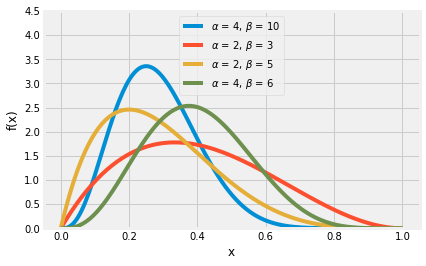

In [20]:
x = np.linspace(0, 1, 200)
alphas = [4, 2, 2, 4]
betas = [10, 3, 5, 6]
for a, b in zip(alphas, betas):
    pdf = st.beta.pdf(x, a, b)
    plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.ylim(0, 4.5)
plt.legend(loc=9)
plt.show()

Below shows how to calculate an equal tailed 95% credible interval. We can use the ppf beta function to get the quintiles from the beta distribution and see that there's a 95% posterior probability that the beta function with parameters alpha 41 and beta 11 is in between 0.669 and 0.887.

In [16]:
st.beta.ppf(0.025,41,11)

0.6688426487470713

In [18]:
st.beta.ppf(0.975,41,11)

0.8871094002502565

#### Non informative prior
For Bernoulli or Binomial data, we can using a so called 'non informative prior', a Beta(0,0) distribution. This is a non-informative prior in the sense that it has an effective sample size of zero, and that using this prior leads to posterior point estimates and interval estimates that match Frequentist estimates. However, this prior pushes its probability away from 0.5 and toward both 0 and 1, and thus it is not likely to ever be a fully accurate description of your prior beliefs. In addition to the point estimate, we have a posterior distribution for the parameter which allows us to calculate posterior probabilities and credible intervals. In simple models, non-informative priors often produce posterior mean estimates that are equivalent to the common frequentist/MLE estimates. We may still use this Bayesian approach because in addition to the point estimate, we have a posterior distribution for the parameter which allows us to calculate posterior probabilities and credible intervals.

### The coin toss example
this is taken from [here](https://ericmjl.github.io/bayesian-stats-talk/)

In [6]:
tosses = [0, 0, 0, 0]

with pm.Model() as coin_model:
    
    theta_prior = pm.Uniform('prior', 0, 1)

    likelihood = pm.Bernoulli('likelihood', p = theta_prior, observed = tosses)


In [7]:
with coin_model:
    # don't worry about this:
    step = pm.Metropolis()
    
    # focus on this, the Inference Button:
    coin_trace = pm.sample(2000, step=step)

Multiprocess sampling (2 chains in 2 jobs)
Metropolis: [prior]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:00<00:00, 5621.11draws/s]
The number of effective samples is smaller than 25% for some parameters.


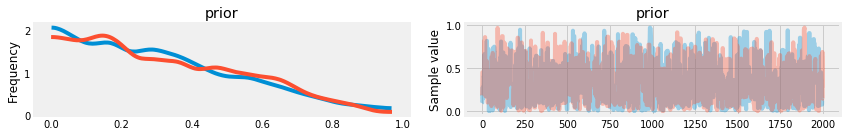

In [8]:
pm.traceplot(coin_trace)
plt.show()

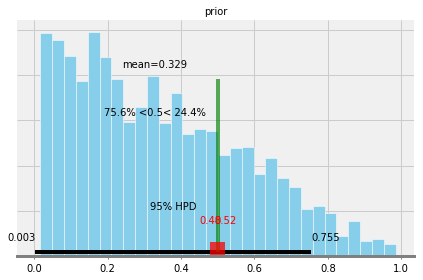

In [9]:
pm.plot_posterior(coin_trace[100:], color='#87ceeb', 
                  rope=[0.48, 0.52], point_estimate='mean', 
                  ref_val=0.5)
plt.show()

## Poisson distribution and bayesian inference with Poisson

In [49]:
from scipy.misc import factorial

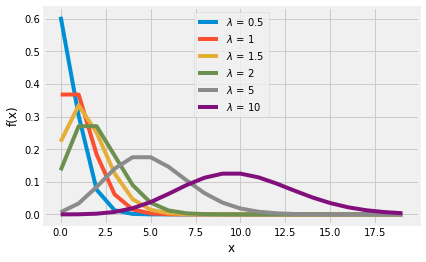

In [85]:
x = np.arange(20)
lambdas = [1/2, 1, 3/2, 2, 5, 10]
# lambdas = [1/2, 1/3 , 1/4 , 1/5]

for a in lambdas:
    pdf = st.poisson.pmf(x, mu=a)
#     pdf = np.exp(-a)*np.power(a, x)/factorial(x)
    plt.plot(x, pdf, label=r'$\lambda$ = {}'.format(a))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.legend(loc=9)
plt.show()

## Gamma function

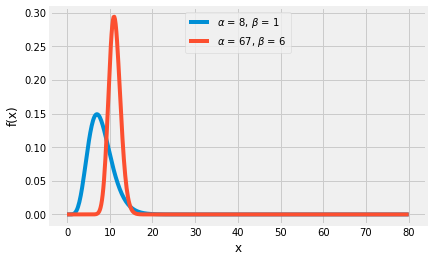

In [86]:
x = np.linspace(0, 80, 500)
alphas = [8, 67]
betas = [1, 6]

for a, b in zip(alphas, betas):
    pdf = st.gamma.pdf(x, a, scale = 1/b)
    plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(a, b))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
# plt.ylim(0, 4.5)
plt.legend(loc=9)
plt.show()

Lower end of a 90% equal-tailed credible interval of agamma distribution.

In [87]:
st.gamma.ppf(0.05, 67, scale = 1/6)

9.021381966387127

probability that a gamma posterior function with alpha = 6 and beta = 93.5 has a posterior probability of lambda < 1/10 

### SCENARIO
Gamma prior and posterior with exponention likelihood function.

The United States Geological Survey maintains a list of significant earthquakes worldwide. We will model the rate of earthquakes of magnitude 4.0+ in the state of California during 2015. An iid exponential model on the waiting time between significant earthquakes is appropriate if we assume:

 - earthquake events are independent,
 - the rate at which earthquakes occur does not change during the year, and
 - the earthquake hazard rate does not change (i.e., the probability of an earthquake happening tomorrow is constant regardless of whether the previous earthquake was yesterday or 100 days ago).
 
Let Y_i denote the waiting time in days between the ith earthquake and the following earthquake. Our model is Y_i ~ Exponential(λ) where the expected waiting time between earthquakes is E(Y)=1/λ days.

Assume the conjugate prior λ∼Gamma(a,b). Suppose our prior expectation for λ is 1/30, and we wish to use a prior effective sample size of one interval between earthquakes.Then a = 1 (a is equal to the effective sample size), also, then b=30, (The prior mean is a/b = 1/30, and since we know the effective sample size a=1, we have b=30.)

If we assume some fake data y = (16, 8, 114, 60, 4, 23, 30, 105) (earthquakes distance in days) then we can calculate the posterior gamma function. The postirior a = a(prior) + n (sample size) and b = b(prior) + sum(y). Therefore the gamma posterior ~ GAMMA(9, 390).
With this scenario, calculate the upper end of the 95% equal-tailed credible interval for λ, the rate of major earthquakes in events per day. NOTE: the 95% credible interval is the equivalent in the frequentist world of the 95% confidence interval. **The 95% equal-tailed credible interval for λ is the iterval that has 95% probability to contain λ.**

In [6]:
st.gamma.ppf(0.975, 9, scale = 1/390)

0.04041843389793157

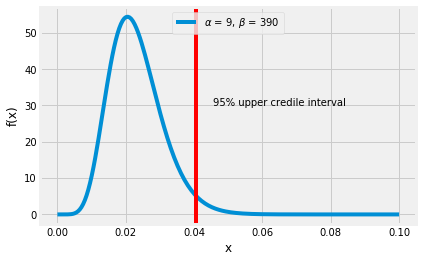

In [24]:
x = np.linspace(0, 0.1, 200)
alpha = 9
beta = 390

pdf = st.gamma.pdf(x, alpha, scale = 1/beta)
plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(alpha, beta))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
upper_credible_interval = st.gamma.ppf(0.975, alpha, scale = 1/beta)
plt.axvline(upper_credible_interval, color='r')
plt.text(upper_credible_interval + 0.005, 30, s='95% upper credile interval')

plt.legend(loc=9)
plt.show()

### SCENARIO
Gamma prior and posterior with exponention likelihood function.

We want to model the bus arrival times as a exponential likelihood function. We believe that busses arrives every 20 minutes and a standard deviation of 1/5. Therefore our prior belief about this rate is that it should have mean 1/20 arrivals per minute with standard deviation 1/5. 

Then the prior is Gamma(a,b) with a=1/16. Recall that the prior mean is a/b = 1/λ which in this case is 1/20. Then b = 20/16 = 1.25.

Suppose that we wish to use a prior with the same mean (1/20), but with effective sample size of one arrival. Then the prior for λ is Gamma(1,20).

In addition to the original Y_1=12, we observe the waiting times for four additional busses: Y_2=15, Y_3=8, Y_4=13.5, Y_5=25.

Recall that with multiple (independent) observations, the posterior for λ is Gamma(α,β) where α=a+n and β=b+∑yi.
Then the mean of the posterior distribution: Gamma(α,β) with α=a+n=1+5 and β=b+∑yi =20+73.5. The posterior mean is (a+n)/(b+∑yi) = 0.06.

With all that being said, QUESTION: what is the posterior probability that λ<1/10



In [7]:
st.gamma.cdf(1/10, 6, scale = 1/93.5)

0.9039698786381929

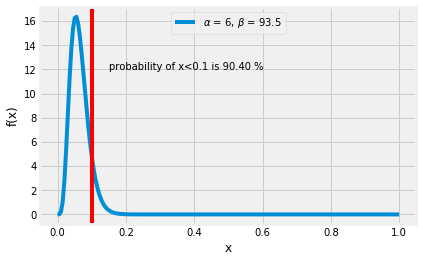

In [34]:
x = np.linspace(0, 1, 200)
alpha = 6
beta = 93.5

pdf = st.gamma.pdf(x, alpha, scale = 1/beta)
plt.plot(x, pdf, label=r'$\alpha$ = {}, $\beta$ = {}'.format(alpha, beta))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
lamda = 1/10
probability = st.gamma.cdf(lamda, alpha, scale = 1/beta)
plt.axvline(lamda, color='r')
plt.text(lamda + 0.05, 12, s='probability of x<{} is {:.2f} %'.format(lamda, probability*100))

plt.legend(loc=9)
plt.show()

## Exponential functions

In [88]:
def exponential_function(x, lamb):
    return [lamb * math.exp(elem) for elem in -lamb * x]

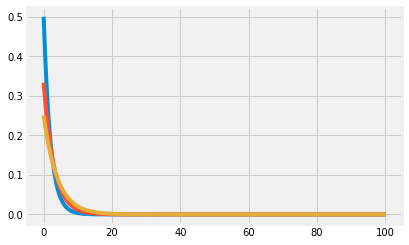

In [92]:
x = np.linspace(0, 100, num=1000)
lambdas = [1/2, 1/3, 1/4]

fig, ax = plt.subplots()
for lambda_value in lambdas:
    y = exponential_function(x, lambda_value)
    sns.lineplot(x=x, y=y, ax=ax)
    
fig.show()

## Normal likelihood
Let's assume the data follows a normal distribution \begin{equation*}
X_i \sim \mathcal{N}(\mu,\,\sigma^{2})\,
\end{equation*}

In **the case we know the variance of the data**, then the prior is:

\begin{equation*}
\mu \sim \mathcal{N}(m_o,\,s_o^{2})\,
\end{equation*}


then
\begin{equation*}
posterior mean = \frac{n}{n+\frac{\sigma^{2}}{s^{2}}} \bar{x} + \frac{\frac{\sigma^{2}}{s^{2}}}{n+\frac{\sigma^{2}}{s^{2}}} m
\end{equation*}


**In the case we don't know the variance of the data** we can build a prior with a conditional for a value for sigma squared
\begin{equation*}
\mu \sim \mathcal{N}(m,\,\frac{\sigma^{2}}{w})\,
\end{equation*}
with 
\begin{equation*}
w = \frac{\sigma^{2}}{\sigma^{2}_u}
\end{equation*}
this is also the effective sample size of the prior. If we are confident in our prior estimate of the mean 'm', we would use a large 'w' if we are not very confident we would use a small 'w'. 


### Example: Normal Likelihood with known mean

Suppose you are trying to calibrate a thermometer by testing the temperature it reads when water begins to boil. Because of natural variation, you take $n$ independent measurements (experiments) to estimate $\theta$, the mean temperature reading for this thermometer at the boiling point. Assume a normal likelihood for these data, with mean $\theta$ and known variance $\sigma^2 = 0.25$ (which corresponds to a standard deviation of 0.5 degrees Celsius).

Suppose your prior for $\theta$ is (conveniently) the conjugate normal. You know that at sea level, water should boil at 100 degrees Celsius, so you set the prior mean at $m_0=100$.

The effective sample size is:

\begin{equation}
\text{prior effettive sample size} = \frac{\sigma^2}{s_o^2}
\end{equation}

We decide for the prior to be equivalent (in effective sample size) to one measurement. Therefore $\frac{\sigma^2}{s_o^2} = 1$. Recall, that we set $\sigma^2 = 0.25$, and therefore $s_o^2$ is also 0.25. 

If you specify a prior variance $s_0^2$ for $\theta$ for your measurements $Y_i,  i=1,\ldots,n$ then the model is described as :

\begin{array}{l}
Y_i\mid\theta \sim N(\theta,\sigma^2) \sim N(\theta,0.25) \\
\text{prior} : \theta \sim N(m_o, s_o^2) \sim N(100, 0.25)
\end{array}

Let's assume we collect the following $n=5$ measurements: $ Y = (94.6, 95.4, 96.2, 94.9, 95.9)$.

The posterior distribution for $\theta$ is :

\begin{equation*}
\text{posterior mean} = \frac{n}{n+\frac{\sigma^{2}}{s^{2}}} \bar{y} + \frac{\frac{\sigma^{2}}{s^{2}}}{n+\frac{\sigma^{2}}{s^{2}}} m_0
\end{equation*}

\begin{equation*}
\text{posterior std} = \frac{1}{\frac{n}{\sigma^2}+\frac{1}{s^2}} 
\end{equation*}

Therefore, doing all the calculation and plugging all numbers
\begin{equation*}
\text{posterior distribution for } \theta \sim N(96.17,  0.042)
\end{equation*}





Hence, the upper end of a 95% equal-tailed credible interval for $\theta$

In [185]:
st.norm.ppf(0.975, 96.17, scale = math.sqrt(0.042))

96.57167308905272

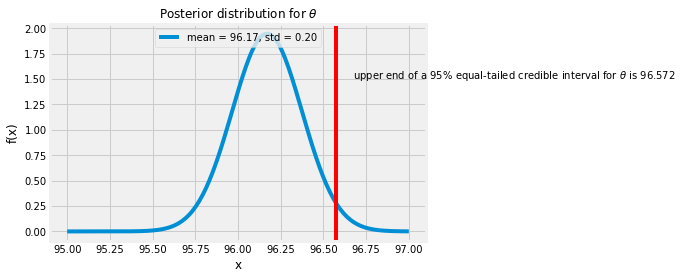

In [187]:
x = np.linspace(95, 97, 200)
mean = 96.17
std = math.sqrt(0.042)

pdf = st.norm.pdf(x, mean, scale = std)
plt.plot(x, pdf, label=r'mean = {}, std = {:.2f}'.format(mean, std))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.title('Posterior distribution for $\\theta$', fontsize=12)

uper_end = st.norm.ppf(0.975, mean, scale = std)
plt.axvline(uper_end, color='r')
plt.text(uper_end + 0.1, 1.5, s='upper end of a 95% equal-tailed credible interval for $\\theta$ is {:.3f}'.format(uper_end))

plt.legend(loc=9)
plt.show()

After collecting these data, is it reasonable to conclude that the thermometer is biased toward low values?
To answer this we will calculate the cumulative distribution function (cdf) for the normal posterior distribution for $\theta$ < 100
\begin{equation*}
P(\theta <100 | y) = st.norm.cdf(100, mean, scale = std)
\end{equation*}

In [168]:
st.norm.cdf(100, mean, scale = std)

1.0

we then conclude that YES, he thermometer is biased toward low values because we have $P(θ<100∣y)>0.9999$.

### Example: Normal likelihood with unkown mean
Your friend moves from city A to city B and is delighted to find her favorite restaurant chain at her new location. After several meals, however, she suspects that the restaurant in city B is less generous. She decides to investigate.

She orders the main dish on 27 randomly selected days throughout the year and records each meal's weight in grams. You still live in city A, so you assist by performing the same experiment at your restaurant. Assume that the dishes are served on identical plates (measurements subtract the plate's weight), and that your scale and your friend’s scale are consistent.

She assumes a normal likelihood for the data with unknown mean μ and unknown variance $\sigma^2$. She uses a model with known mean and unkown variance, conditional on $\sigma^2$, therefore the prior for $\mu$ is normal with mean $m$ and variance $\frac{\sigma^2}{w}$.
Next, the marginal prior for $\sigma^2$ = $\text{Inverse-Gamma}(a,b)$.

Your friend's prior guess on the mean dish weight is 500 grams, so we set m=500. She is not very confident with this guess, so we set the prior effective sample size w=0.1. Finally, she sets a=3 and b=200.

We can learn more about this inverse-gamma prior by simulating draws from it. If a random variable $X$ follows a $\text{Gamma}(a,b)$ distribution, then $\frac{1}{X} $ follows an $\text{Inverse-Gamma}(a,b)$ distribution. Hence, we can simulate draws from a gamma distribution and take their reciprocals, which will be draws from an inverse-gamma.
To simulate 1000 draws:

In [96]:
r = st.invgamma.rvs(3, scale=200, size=1000)
np.mean(r)

100.06924825365492

or

In [108]:
r = st.gamma.rvs(3, scale=1/200, size=1000)
np.mean(1/r)

100.86240081598238

With $n=27$ data points, your friend calculates the sample mean $\bar{y}=609.7$ and sample variance $s^2=\frac{1}{n−1}\sum(y_i−\bar{y})^2=401.8$.

Using the update formulas from normal distribution with unkown mean, she calculates the following posterior distributions:
\begin{array}{l}
σ^2∣y∼Inverse-Gamma(a′,b′) \\
μ∣σ^2,y∼N(m′,\frac{\sigma^2}{w+n})
\end{array}
where
\begin{array}{l}
a′ = a + \frac{n}{2} = 3 + \frac{27}{2} = 16.5 \\
b′ = b + \frac{n−1}{2}s^2+\frac{wn}{2(w+n)}(\bar{y}−m)^2=200+\frac{27−1}{2}401.8+\frac{0.1⋅27}{2(0.1+27)}(609.7−500)^2=6022.9 \\
m′=\frac{n\bar{y}+wm}{w+n}=\frac{27⋅609.7+0.1⋅500}{0.1+27}=609.3 \\
w=0.1 \\  w+n=27.1.
\end{array}



To simulate draws from this posterior, begin by drawing values for $\sigma^2$ from its posterior using the method from the preceding question. Then, plug these values for $\sigma^2$ into the posterior for $\mu$ and draw from that normal distribution.

In [169]:
number_of_draws = 1000
mu_b = []
for i in range(0, number_of_draws):
    sig2 = st.invgamma.rvs(16.5, scale=6022.9, size=1)
    single_mu = np.random.normal(loc=609.3, scale=math.sqrt(sig2/27.1), size=1) #Draw from normal distribution loc is the mean and scale is the std
    mu_b.append(single_mu[0])

In [170]:
np.percentile(mu_b, [0.025, 0.975])

array([592.58442824, 599.86702612])

You complete your experiment at Restaurant A with $n=30$ data points, which appear to be normally distributed. You calculate the sample mean $\bar{y}=622.8$ and sample variance $s^2=\frac{1}{n−1}\sum(y_i−\bar{y})^2=403.1$.

Therefore, for resturant A, we can calculate the posterior mean using the formulas above, using the same prior, as follows:

In [171]:
a = 3 + 30/2
b = 200 + (((30 - 1)/2)*403.1)+(0.1*30)/(2*(0.1+30))*math.pow((622.8-500),2)
m = (30*622.8+0.1*500)/(0.1+30)
w_plus_n = 30.1

print('a = {:.4f}  b = {:.4f}  m = {:.4f}  '.format(a,b,m))

a = 18.0000  b = 6796.4370  m = 622.3920  


In [172]:
number_of_draws = 1000
mu_a = []
for i in range(0, number_of_draws):
    sig2 = st.invgamma.rvs(a, scale=b, size=1)
    single_mu = np.random.normal(loc=m, scale=math.sqrt(sig2/w_plus_n), size=1) #Draw from normal distribution loc is the mean and scale is the std
    mu_a.append(single_mu[0])
    
np.percentile(mu_a, [0.025, 0.975])

array([611.07756588, 614.58664009])

Treating the data from Restaurant A as independent from Restaurant B, we can now attempt to answer your friend's original question: is restaurant A more generous? To do so, we can compute posterior probabilities of hypotheses like $\mu_A > \mu_B $.
This is a simple task if we have simulated draws for $\mu_A$ and $\mu_B$. 
For $i=1$, $\ldots, N_i=1,…,N$ (the number of simulations drawn for each parameter), make the comparison $\mu_A > \mu_B$ using the iith draw for $\mu_A$ and $\mu_B$. Then count how many of these return a TRUE value and divide by NN, the total number of simulations.

In [173]:
np.sum(np.greater(mu_a, mu_b))/1000

0.994

We conclude that YES the dishes from resturant A are less than resturant B, because $\mu_A > \mu_B$ is at least 0.95

## Bayesian linear regression from scratch
Recall that linear regression is a model for predicting a response or dependent variable (Y ,also called an output) from one or more covariates or independent variables (X, also called explanatory variables, inputs, or features). For a given value of a single x, the expected value of y is
\begin{equation*}
E[y] = \beta_0 + \beta_1 x
\end{equation*}

or we could say that $Y \sim N(\beta_0 + \beta_1 x, \sigma^2)$. For data $(x1, y1), . . . ,(xn, yn)$, the fitted values for
the coefficients, $\hat{\beta_0}$ and $\hat{\beta_1}$ are those that minimize the sum of squared errors $\sum_{i=1}^{n} (y_i − \hat{y_i})^2$, where the predicted values for the response are $\hat{y} = \hat{\beta_0} + \hat{\beta_0} x$. We can calculate these values fitting coefficients that give the least-squares line for the data.
This model extends to multiple covariates, with one $\beta_j$
for each of the k covariates:
\begin{equation*}
E[y_i] = \beta_0 + \beta_1 x_{i1} + ... + \beta_k x_{ik}
\end{equation*}


In [4]:
from sklearn.datasets import load_boston
boston = load_boston() # this loads the the boston house-prices dataset (regression).

In [30]:
boston_df = pd.DataFrame(data= np.c_[boston.data, boston.target], columns=np.append(boston.feature_names,'price'))
boston_df.head()                 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [40]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams["font.size"] = 18

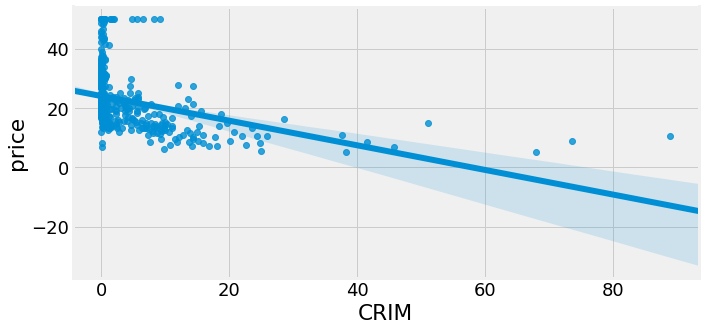

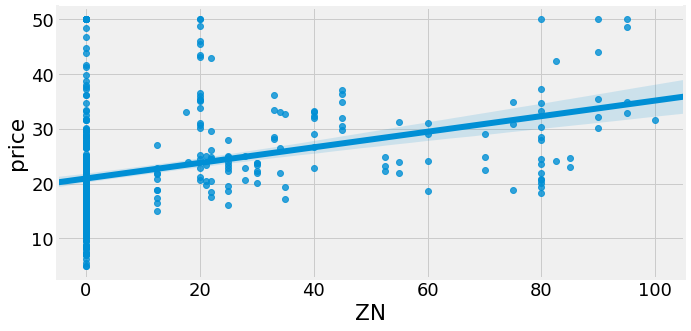

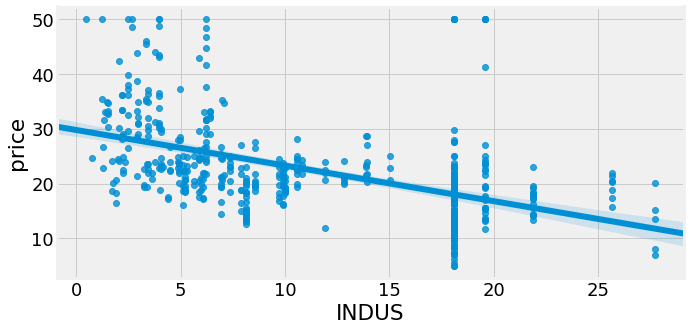

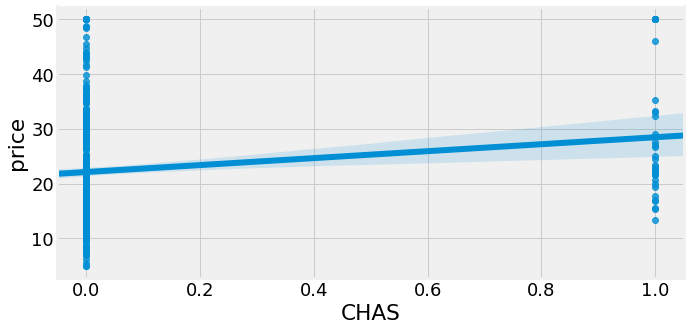

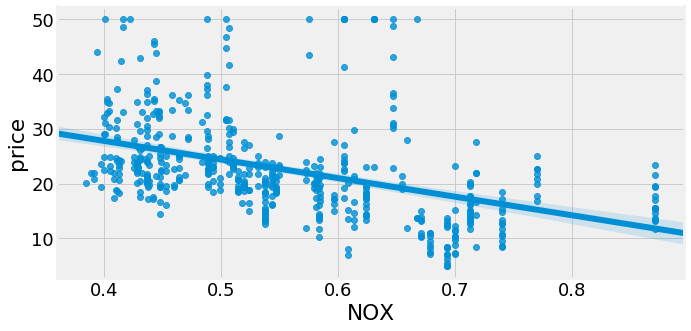

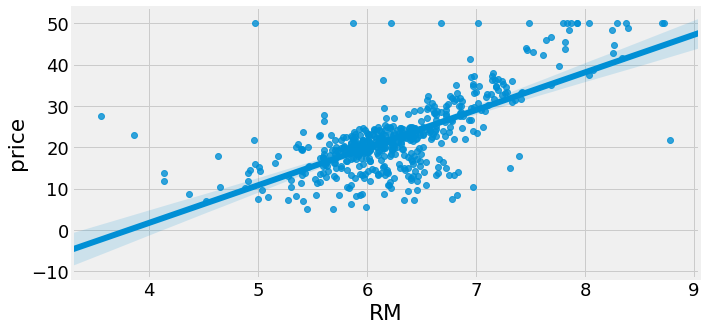

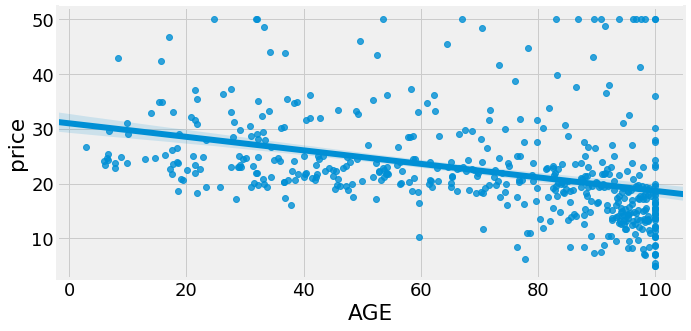

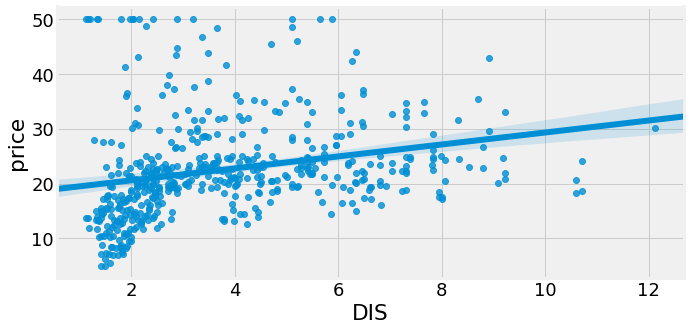

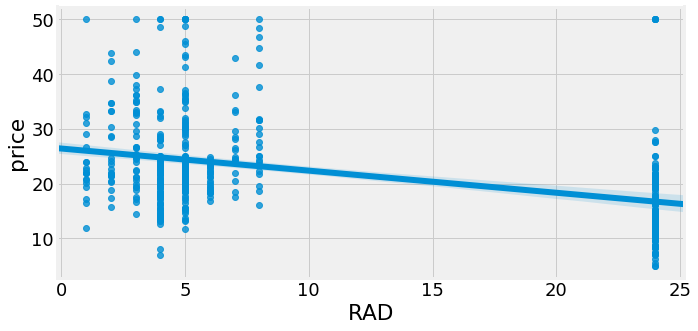

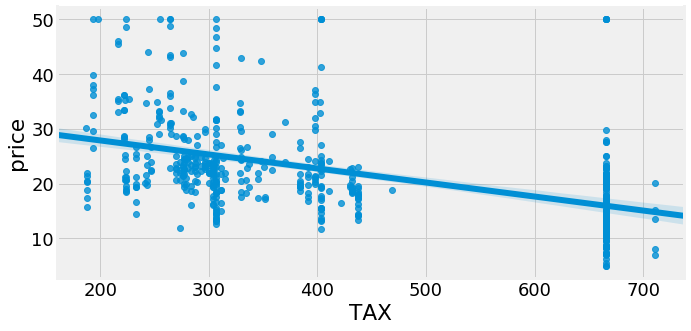

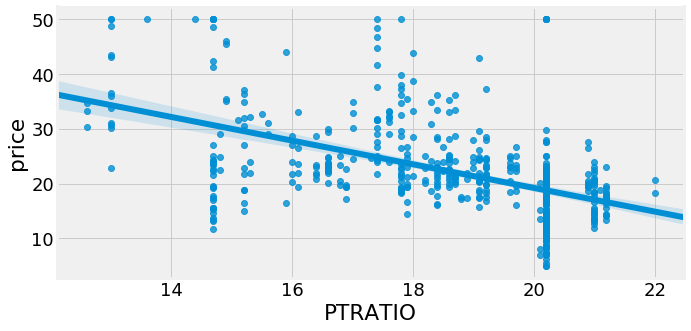

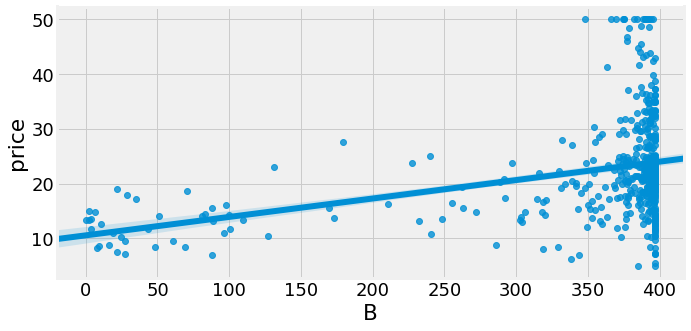

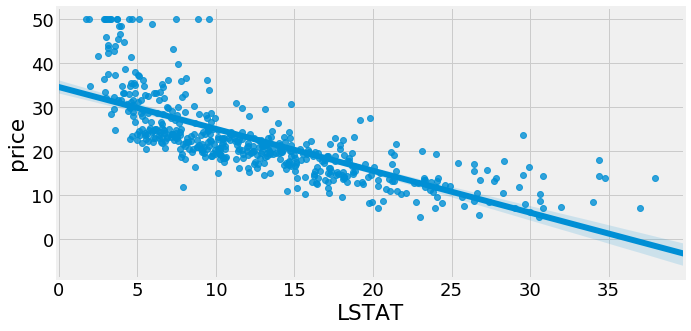

In [41]:
#sns.pairplot(boston_df, y_vars=['price'], x_vars=boston.feature_names, kind='reg')

for feat in boston.feature_names:
    sns.regplot(x=feat, y="price", data=boston_df)
    plt.show()

In [48]:
X = boston_df["RM"] ## X usually means our input variables (or independent variables)
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model. It is so weird that this is not done by default! and we actually need to do this by hand

# Note the difference in argument order
model = sm.OLS(boston_df['price'], X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           2.49e-74
Time:                        17:58:42   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Interpreting the Table
This is a very long table, isn’t it? First we have what’s the dependent variable and the model and the method. OLS stands for Ordinary Least Squares and the method “Least Squares” means that we’re trying to fit a regression line that would minimize the square of distance from the regression line (see the previous section of this post). Date and Time are pretty self-explanatory :) So as number of observations. Df of residuals and models relates to the degrees of freedom — “the number of values in the final calculation of a statistic that are free to vary.”

We have a y-intercept at -34.67. The coefficient of 9.1021 means that as the `RM` variable increases by 1, the predicted value of `price` increases by 9.1021. A few other important values are the R-squared — the percentage of variance our model explains; the standard error (is the standard deviation of the sampling distribution of a statistic, most commonly of the mean); 
 The t scores and p-values are the frequentist significant test. In our example, the RM has statistically significant p-value; there is a 95% confidence intervals for the `RM` (meaning we predict at a 95% percent confidence that the value of RM is between 8.279 to 9.925). **NOTE:** This interval do not include 0, so we can be pretty sure that there is a positive correlation between `RM` and `price`.
 
 We can see here that this model has a low R-squared value — 0.484, meaning that this model explains 48.4% of the variance in our dependent variable. Whenever we add variables to a regression model, R² will be higher, explaing better the variability. We can see however, that RM is statistically significant in predicting (or estimating) the median house value.

#### Let's do the same including all features

In [43]:
# Note the difference in argument order
model = sm.OLS(boston_df['price'], boston_df[boston.feature_names]).fit()
predictions = model.predict(boston_df[boston.feature_names]) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     891.3
Date:                Fri, 26 Apr 2019   Prob (F-statistic):               0.00
Time:                        17:26:13   Log-Likelihood:                -1523.8
No. Observations:                 506   AIC:                             3074.
Df Residuals:                     493   BIC:                             3128.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Example
Using the dataset found [Here](http://www.stat.ufl.edu/~winner/data/pgalpga2008.dat) consist of season statistics for individual golfers on the United States LPGA and PGA tours. The first column reports each player's average driving distance in yards. The second column reports the percentage of the player's drives that finish in the fairway, measuring their accuracy. The third and final column has a 1 to denote a female golfer (on the LPGA tour), and a 2 to denote male golfer (on the PGA tour).

In [74]:
with open('pgalpga2008.dat','r') as f:
    golf_df = pd.DataFrame([l.rstrip().split() for l in f], columns=['avg_driving_distance', 'perc_accuracy', 'sex'])

golf_df.avg_driving_distance = golf_df.avg_driving_distance.astype(np.float64, copy=False)
golf_df.perc_accuracy = golf_df.perc_accuracy.astype(np.float64, copy=False)
golf_df.sex = golf_df.sex.astype(np.int, copy=False)
golf_df.head()

,avg_driving_distance,perc_accuracy,sex
0,243.2,67.0,1
1,254.5,70.1,1
2,253.1,59.3,1
3,228.1,70.4,1
4,240.8,69.5,1


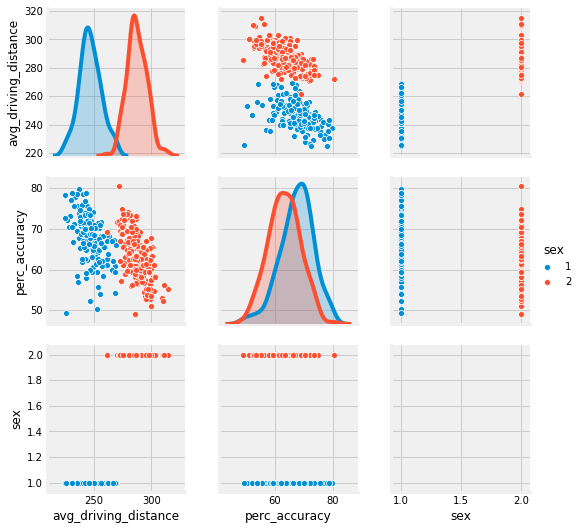

In [76]:
sns.pairplot(data=golf_df, hue='sex')

Looking at the scatter plots with average drive distance on the x-axis and percent accuracy on the y-axis, we can observe that drive distance and accuracy are negatively correlated; greater distances are associated with less accuracy.

In [90]:
X = golf_df.loc[golf_df.sex == 1, 'avg_driving_distance']
y = golf_df.loc[golf_df.sex == 1, 'perc_accuracy']
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model. It is so weird that this is not done by default! and we actually need to do this by hand

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          perc_accuracy   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     33.61
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           3.66e-08
Time:                        20:12:26   Log-Likelihood:                -482.00
No. Observations:                 157   AIC:                             968.0
Df Residuals:                     155   BIC:                             974.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  130.8933     10.928     11.978      0.000     109.307     152.480
avg_driving_distance    -0.2565      0.044     -5.797      0.000      -0.344      -0.169
==============================================================================
Omnibus:                       38.145   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.558
Skew:                          -1.122   Prob(JB):                     1.75e-16
Kurtosis:                       5.462   Cond. No.                     6.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In this particular model, the intercept term is not interpretable, as we would not expect to see a 0-yard drive (but it is still necessary). Predictions should generally be made only within the range of the observed data.

The posterior mean estimate of the slope parameter b relating drive distance to accuracy is -0.2565.

For each additional yard of driving distance, we expect to see a decrease in percentage accuracy of $\lvert b \rvert$.

----

Below is the posterior predictive mean estimate of driving accuracy for a new female golfer whose average driving distance is $x=260$ yards.

In [94]:
prediction = model.get_prediction([1, 260])
prediction.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,64.205732,0.718569,62.78628,65.625184,53.745277,74.666188


The posterior predictive mean estimate of driving accuracy for a new female golfer whose average driving distance is $x=260$ yards.

The 95% posterior predictive interval for the driving accuracy of a new female golfer whose average driving distance is $x=260$ yards is $[53.745, 74.666]$.
If we select a new female golfer who averages 260 yards per drive, our probability that her driving accuracy will be in the interval is .95.